<a href="https://colab.research.google.com/github/aryan-cs/poker-like-games/blob/discrete-poker/discrete_poker_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Due Diligences

## Preface
While the paper designates letters to each player (Player A, Player B), the code makes use of integers for readability.

`P1`, `p1_foo` → Player A, Property of Player A

`P2`, `p2_foo` → Player B, Property of Player B

## Setup
Run this cell to set up some helpful tools.

In [ ]:
import time
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table

log_data = []
P1 = True
P2 = True

RED = "#ff2684"
BLUE = "#19beff"
WHITE = "#ebebeb"
GRAY = "#858585"

# First player has n options, second player has n - 1 options (picking without replacement)
def nCr(n): return n * (n - 1) # / 2

# Saving -- irrelevant
def log(p1_cutoff, p2_cutoff, p1_expected_payout, p2_expected_payout, time_taken, verbose=True):
    log_data.append({
        'p1_cutoff': p1_cutoff,
        'p2_cutoff': p2_cutoff,
        'p1_expected_payout': p1_expected_payout,
        'p2_expected_payout': p2_expected_payout,
        'time_taken': time_taken
    })

    message = '''
P1 Cutoff: {0}
P2 Cutoff: {1}
P1 Payout: {2:.5f}
P2 Payout: {3:.5f}
Executed in {4:.5f} seconds
'''.format(p1_cutoff,
            p2_cutoff,
            p1_expected_payout,
            p2_expected_payout,
            time_taken)

    if verbose: boxed(message)

# Visual appeal -- irrelevant
def boxed(text):
    lines = text.splitlines()
    if lines and lines[0] == "": lines = lines[1:]
    if not lines: return

    max_width = max(map(len, lines))

    print("┌" + "─" * (max_width + 2) + "┐")
    for line in lines:
      print(f"│ {line.ljust(max_width)} │")
    print("└" + "─" * (max_width + 2) + "┘")

# Graphing -- irrelevant
def graph_scatter_3d(p1=False, p2=False):
    df = pd.DataFrame(log_data)
    fig = go.Figure()

    if p1:
        fig.add_trace(go.Scatter3d(
            x=df['p1_cutoff'],
            y=df['p2_cutoff'],
            z=df['p1_expected_payout'],
            mode='markers',
            marker=dict(color='blue', size=4),
            name='Player 1'
        ))

    if p2:
        fig.add_trace(go.Scatter3d(
            x=df['p1_cutoff'],
            y=df['p2_cutoff'],
            z=df['p2_expected_payout'],
            mode='markers',
            marker=dict(color='red', size=4),
            name='Player 2'
        ))

    fig.update_layout(
        title='Payouts as a function of Cutoffs | Scatter',
        scene=dict(
            xaxis_title='α',
            yaxis_title='β',
            zaxis_title='Payout'
        ),
        showlegend=True
    )

    fig.show()

# Graphing -- irrelevant
def graph_contour_3d(p1=False, p2=False):
    df = pd.DataFrame(log_data).groupby(['p1_cutoff', 'p2_cutoff'], as_index=False).mean()
    fig = go.Figure()

    x = np.unique(df['p1_cutoff'])
    y = np.unique(df['p2_cutoff'])
    X, Y = np.meshgrid(x, y)

    if p1:
        Z1 = df.pivot_table(
            index='p2_cutoff',
            columns='p1_cutoff',
            values='p1_expected_payout').values
        fig.add_trace(go.Surface(x=X, y=Y, z=Z1,
                                 colorscale='Blues',
                                 opacity=0.9,
                                 name="Player 1 Payout"))

    if p2:
        Z2 = df.pivot_table(
            index='p2_cutoff',
            columns='p1_cutoff',
            values='p2_expected_payout').values
        fig.add_trace(go.Surface(x=X, y=Y, z=Z2,
                                 colorscale='Reds',
                                 opacity=0.9,
                                 name="Player 2 Payout"))

    fig.update_layout(
        title='Eᵢ(α, β)',
        scene=dict(
            xaxis_title='α',
            yaxis_title='β',
            zaxis_title='Payout'
        ),
        showlegend=True
    )

    fig.show()

def graph_2d(p1=False, p2=False):
    df = pd.DataFrame(log_data).groupby(['p1_cutoff', 'p2_cutoff'], as_index=False).mean()

    plt.figure(figsize=(10, 6))

    if p1:
        # Use the BLUE variable for Player 1
        plt.plot(df['p1_cutoff'], df['p1_expected_payout'], label='Player 1 Payout', color=BLUE, linewidth=2)

    if p2:
        # Use the RED variable for Player 2
        plt.plot(df['p1_cutoff'], df['p2_expected_payout'], label='Player 2 Payout', color=RED, linewidth=2)

    # Adding title and labels
    plt.title('Payouts as a function of Cutoffs | Level Curve', fontsize=16)
    plt.xlabel('Player Cutoff', fontsize=14)
    plt.ylabel('Expected Payout', fontsize=14)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

# Displaying payoff matrix -- irrelevant
def expected_payoffs_table(p1=False, p2=False):
    if p1 and p2:
        boxed("Please use only one flag per table.")
        return

    console = Console()
    df = pd.DataFrame(log_data).groupby(['p1_cutoff', 'p2_cutoff'], as_index=False).mean()

    if p1:
        pivot = df.pivot(index='p1_cutoff', columns='p2_cutoff', values='p1_expected_payout')
        title = "E(c1, c2) for P1 | " + str(n) + " x " + str(n)
    elif p2:
        pivot = df.pivot(index='p1_cutoff', columns='p2_cutoff', values='p2_expected_payout')
        title = "E(c1, c2) for P2 | " + str(n) + " x " + str(n)
    else:
        boxed("Please specify either p1=True or p2=True")
        return

    table = Table(title=title, show_lines=True, padding=(0, 1), collapse_padding=True)
    table.add_column("C", style=WHITE, justify="right")

    for col in pivot.columns:
        table.add_column(f"{col}", justify="right")

    def format_value(val):
        if pd.isnull(val):
            return f"[#ebebeb]-[/#ebebeb]"
        color = BLUE if val > 0 else RED if val < 0 else WHITE
        formatted_val = f"{int(val)}" if val == int(val) else f"{val:.5f}"
        return f"[{color}]{formatted_val}[/{color}]"

    for idx, row in pivot.iterrows():
        idx_formatted = f"{int(idx)}" if idx == int(idx) else f"{idx:.2f}"
        table_row = [idx_formatted] + [format_value(val) for val in row]
        table.add_row(*table_row, end_section=True)

    console.print(table)

# Exporting -- irrelevant
def save():
    df = pd.DataFrame(log_data)
    df.to_csv('data.csv', index=False)


## Simulation of Opposing Cutoff Strategies
Simulating payoffs for various cutoff combinations.

┌───────────────────────────────────────────┐
│ Executed all iterations in 1.971 seconds. │
└───────────────────────────────────────────┘


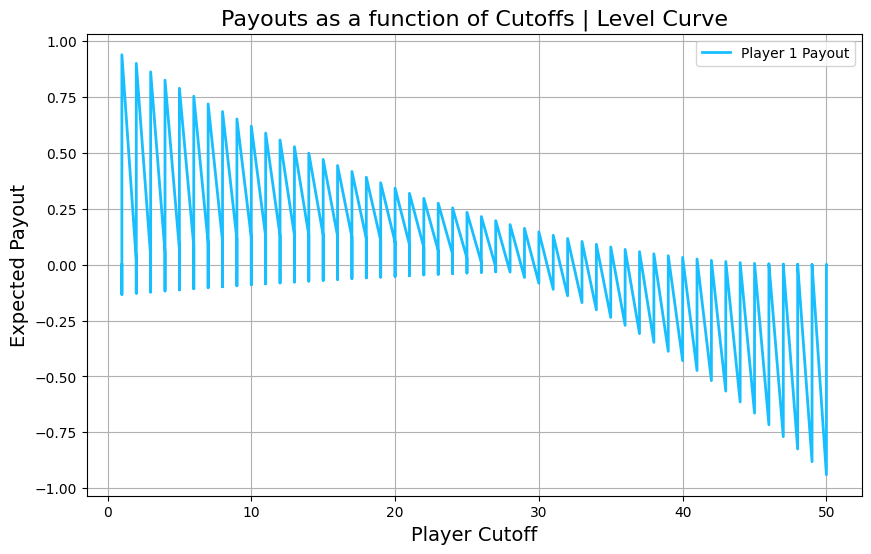

In [ ]:
#@title { vertical-output: true }

"""

  Example n values:
    n = 3: Ace/King/Queen
    n = 6: Dice
    n = 13: Full Suit Poker
    n = 1000: Roughly continuous

  Iterating for cutoff ranges of [1, test_range]

"""
n = 50
test_range = n
p1_expected_payout, p2_expected_payout = 0, 0
trials = nCr(n)

def test_cutoffs(p1_cutoff, p2_cutoff):

  start_time = time.time()

  global p1_expected_payout
  global p2_expected_payout

  p1_expected_payout = 0
  p2_expected_payout = 0

  # Testing every possible 'card' for Player A and Player B
  for p1_card in range(1, n + 1):
    for p2_card in range(1, n + 1):

      if p1_card == p2_card: continue

      # Player A in betting region, Player B in betting region
      if p1_card >= p1_cutoff and p2_card >= p2_cutoff:

        # Case BBW
        if p1_card > p2_card:       # Player A wins showdown
          p1_expected_payout += 2
          p2_expected_payout -= 2

        # Case BBL
        else:                       # Player B wins showdown
          p1_expected_payout -= 2
          p2_expected_payout += 2

      # Player A in folding region, Player B in folding region
      elif p1_card < p1_cutoff and p2_card < p2_cutoff:

        # Case FFW
        if p1_card > p2_card:       # Player A wins showdown
          p1_expected_payout += 1
          p2_expected_payout -= 1

        # Case FFL
        else:                       # Player B wins showdown
          p1_expected_payout -= 1
          p2_expected_payout += 1

      # Player A in betting region, Player B in folding region | Player B forfeits, Player A wins by default
      elif p1_card >= p1_cutoff:

        # Case BFW
        p1_expected_payout += 1
        p2_expected_payout -= 1

      # Player A in folding region, Player B in betting region | Player A forfeits, Player B wins by default
      elif p2_card >= p2_cutoff:

        # Case FBL
        p1_expected_payout -= 1
        p2_expected_payout += 1

  return time.time() - start_time

log_data = []
start_time = time.time()

'''
  Testing all possible cutoffs
  A cutoff is defined as the minimum value a player must have in order to bet
'''
for p1_test_cutoff in range(1, test_range + 1):
  for p2_test_cutoff in range(1, test_range + 1):
    timeTaken = test_cutoffs(p1_test_cutoff, p2_test_cutoff)
    # timeTaken = test_cutoffs(p1_test_cutoff, n / 2)
    log(p1_test_cutoff,
        p2_test_cutoff,
        p1_expected_payout / trials,
        p2_expected_payout / trials,
        # p1_expected_payout,
        # p2_expected_payout,
        timeTaken,
        verbose=False)

boxed(f"Executed all iterations in {round(time.time() - start_time, 3)} seconds.\n")

# Add flags as necessary (P1, P2)
graph_scatter_3d(P1)
# graph_contour_3d(P1)
graph_2d(P1)
# expected_payoffs_table(P1)
save()

## Plot of Possible Regions

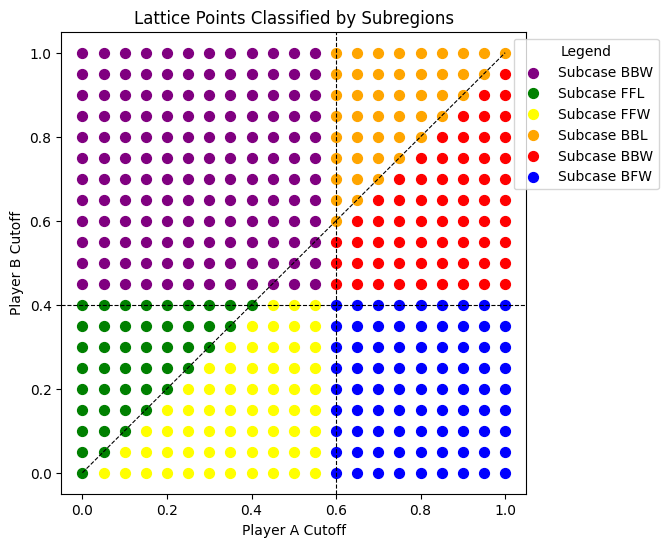

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
alpha, beta = 0.6, 0.4  # Example values for alpha and beta
lattice_spacing = 0.05

# Generate lattice points
x_points = np.arange(0, 1 + lattice_spacing, lattice_spacing)
y_points = np.arange(0, 1 + lattice_spacing, lattice_spacing)
X, Y = np.meshgrid(x_points, y_points)

# Classify points into subregions
colors = np.empty(X.shape, dtype=object)  # Use dtype=object for string colors
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x, y = X[i, j], Y[i, j]
        if x < alpha and y > beta:
            colors[i, j] = 'purple'  # Subcase BBW
        elif x < alpha and y <= beta:
            if y >= x:
                colors[i, j] = 'green'  # Subcase FFL
            else:
                colors[i, j] = 'yellow'  # Subcase FFW
        elif x >= alpha and y > beta:
            if y >= x:
                colors[i, j] = 'orange'  # Subcase BBL
            else:
                colors[i, j] = 'red'  # Subcase BBW
        elif x >= alpha and y <= beta:
            colors[i, j] = 'blue'  # Subcase BFW

# Flatten arrays for scatter plot
X_flat = X.flatten()
Y_flat = Y.flatten()
colors_flat = colors.flatten()

# Plot lattice points with classified colors
plt.figure(figsize=(6, 6))

# Plot each subregion separately to create a legend
unique_colors = {
    "purple": "Subcase BBW",
    "green": "Subcase FFL",
    "yellow": "Subcase FFW",
    "orange": "Subcase BBL",
    "red": "Subcase BBW",
    "blue": "Subcase BFW"
}

for color, label in unique_colors.items():
    mask = colors_flat == color
    plt.scatter(X_flat[mask], Y_flat[mask], c=color, s=50, label=label)

# Add boundaries and diagonal line (y=x)
plt.axvline(x=alpha, color='black', linestyle='--', linewidth=0.8)
plt.axhline(y=beta, color='black', linestyle='--', linewidth=0.8)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.8)

# Add labels and legend
plt.title("Lattice Points Classified by Subregions")
plt.xlabel("Player A Cutoff")
plt.ylabel("Player B Cutoff")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1), title="Legend")
plt.show()


## Determining if Cutoff Strategy is Dominiant

This code iterates over all 2^n pure strategies for both players and checks to see if the Cutoff Strategy payout yields is greater than or equal to the payout by any other strategy. We find that the Cutoff Strategy is ***not*** a dominant strategy.


In [ ]:
#@title { vertical-output: true }


import itertools

n = 3

def indices_of_max(data):
    if not data: return []
    max_value = max(data)
    return [index for index, value in enumerate(data) if value == max_value]

def test_betting_strategies(p1_hands, p2_hands):
    p1_payouts = []
    p1_strategies = []

    for p2_betting_set in p2_hands:
        p1_payouts.clear()
        p1_strategies.clear()

        for p1_betting_set in p1_hands:
            p1_expected_payout = 0
            p2_expected_payout = 0

            for p1_card in range(1, n + 1):
                for p2_card in range(1, n + 1):
                    if p1_card == p2_card:
                        continue

                    if (p1_card in p1_betting_set) and (p2_card in p2_betting_set):
                        if p1_card > p2_card:
                            p1_expected_payout += 2
                            p2_expected_payout -= 2
                        else:
                            p1_expected_payout -= 2
                            p2_expected_payout += 2

                    elif (p1_card not in p1_betting_set) and (p2_card not in p2_betting_set):
                        if p1_card > p2_card:
                            p1_expected_payout += 1
                            p2_expected_payout -= 1
                        else:
                            p1_expected_payout -= 1
                            p2_expected_payout += 1

                    elif (p1_card in p1_betting_set) and (p2_card not in p2_betting_set):
                        p2_expected_payout -= 1
                        p1_expected_payout += 1

                    elif (p1_card not in p1_betting_set) and (p2_card in p2_betting_set):
                        p2_expected_payout += 1
                        p1_expected_payout -= 1

            p1_strategies.append(p1_betting_set)
            p1_payouts.append(p1_expected_payout)

        p1_maxes = indices_of_max(p1_payouts)
        bad_strategies = []
        bad_payouts = 2
        is_possible = False

        for index in p1_maxes:
            strat = list(p1_strategies[index])
            works = all(strat[len(strat) - i - 1] == n - i for i in range(len(strat)))

            if works:
                is_possible = True
            else:
                bad_strategies = p1_strategies[index]
                bad_payouts = p1_payouts[index]

        # Print the optimal strategy for Player A given Player B's strategy
        # boxed(
        #     "P1 Strat: " + str(p1_strategies[index]) + "\n" +
        #     "Payout: " + str(p1_payouts[index])
        # )

        if not is_possible:
            boxed(
              "P2 Strat: " + str(p2_betting_set) + "\n"
              "Payout: " + str(bad_payouts) + "\n"
              "Not Cutoff P1 Strat: " + str(bad_strategies) + "\n"
            )

# Example usage
p1_hands = [[], [1], [2], [3], [1, 2], [1, 3], [2, 3], [1, 2, 3]]
p2_hands = [[], [1], [2], [3], [1, 2], [1, 3], [2, 3], [1, 2, 3]]

test_betting_strategies(p1_hands, p2_hands)


┌─────────────────────────────┐
│ P2 Strat: [3]               │
│ Payout: 1                   │
│ Not Cutoff P1 Strat: [1, 3] │
└─────────────────────────────┘


## Plotting all Strategies
Displays the expected payout for player A over all (2^n) x (2^n) possible combinations of strategies.

In [ ]:
import itertools
import sys
import pandas as pd
from IPython.display import display
n = 3
badvales = 0
def indices_of_max(data):
    if not data:
        return []
    max_value = max(data)
    return [index for index, value in enumerate(data) if value == max_value]

def findsubsets(s, N):
    return list(itertools.combinations(s, N))

p1_payouts = []
p1_strats = []
all_payouts = []
all_strats = []
all_stratsp2 = []
for N in range(0, n + 1):
    p1_cutoffs = [i for i in range(1, n + 1)]
    p2_cutoffs = [i for i in range(1, n + 1)]
    for p2bets in findsubsets(p2_cutoffs, N):
        all_stratsp2.append(p2bets)
        p1_payouts = []
        p1_strats = []
        for M in range(0, n + 1):
            for p1bets in findsubsets(p1_cutoffs, M):
                p1_expected_payout = 0
                p2_expected_payout = 0
                for p1_card in range(1, n + 1):
                    for p2_card in range(1, n + 1):
                        if p1_card == p2_card:
                            continue
                        if (p1_card in p1bets) and (p2_card in p2bets):
                            if p1_card > p2_card:
                                p1_expected_payout += 2
                                p2_expected_payout -= 2
                            else:
                                p1_expected_payout -= 2
                                p2_expected_payout += 2
                        elif (p1_card not in p1bets) and (p2_card not in p2bets):
                            if p1_card > p2_card:
                                p1_expected_payout += 1
                                p2_expected_payout -= 1
                            else:
                                p1_expected_payout -= 1
                                p2_expected_payout += 1
                        elif (p1_card not in p1bets) and (p2_card in p2bets):
                            p2_expected_payout += 1
                            p1_expected_payout -= 1
                        elif (p1_card in p1bets) and (p2_card not in p2bets):
                            p2_expected_payout -= 1
                            p1_expected_payout += 1
                p1_strats.append(p1bets)
                p1_payouts.append(p1_expected_payout)
        all_strats.append(p1_strats)
        all_payouts.append(p1_payouts)
df = pd.DataFrame(all_payouts, columns = all_strats[0],index =all_stratsp2)
df.index.name = "P2 Strategies:"
df.columns.name = "P1 Strategies:"
display(df.style.set_properties(**{'border': '1px solid black'}))

P1 Strategies:,(),"(1,)","(2,)","(3,)","(1, 2)","(1, 3)","(2, 3)","(1, 2, 3)"
P2 Strategies:,,,,,,,,
(),0,4,2,0,6,4,2,6
"(1,)",-4,0,1,-1,5,3,4,8
"(2,)",-2,-1,0,1,1,2,3,4
"(3,)",0,1,-1,0,0,1,-1,0
"(1, 2)",-6,-5,-1,0,0,1,5,6
"(1, 3)",-4,-3,-2,-1,-1,0,1,2
"(2, 3)",-2,-4,-3,1,-5,-1,0,-2
"(1, 2, 3)",-6,-8,-4,0,-6,-2,2,0


## Finding Cycles

In [ ]:
import numpy as np
import pandas as pd

def get_lexicographically_smallest_shifted(cycle):
    n = len(cycle)
    # Generate all cyclic shifts and select the lexicographically smallest one
    shifts = [cycle[i:] + cycle[:i] for i in range(n)]
    smallest_shift = min(shifts)
    return smallest_shift

# Get row-wise max indices and column-wise min indices
max_rows_indices = df.idxmax(axis=1).apply(lambda col: df.columns.get_loc(col)).tolist()
min_cols_indices = df.idxmin().apply(lambda row: df.index.get_loc(row)).tolist()

print("Max Rows:", max_rows_indices)
print("Min Cols:", min_cols_indices)

periods = np.zeros(2**n)
cycles = set()  # Use a set to store unique cycles

# Iterate over rows
for row in range(2**n):
    col = max_rows_indices[row]  # Ensure valid indexing
    currpos = [row, col]
    counter = 0
    visited = {}
    turn = True
    cycle = []  # To track the current cycle
    while True:
        if tuple(currpos) in visited:
            # A cycle has been detected
            cycle_start = visited[tuple(currpos)]
            cycle = tuple(cycle[cycle_start:])  # Convert the cycle part to a tuple
            periods[row] = counter - visited[tuple(currpos)]  # Store period length
            cycles.add(cycle)  # Store the distinct cycle (set ensures uniqueness)
            break
        visited[tuple(currpos)] = counter
        cycle.append(tuple(currpos))  # Add current position to the cycle
        if turn:
            currpos[0] = min_cols_indices[currpos[1]]
        else:
            currpos[1] = max_rows_indices[currpos[0]]
        turn = not turn  # Toggle turn
        counter += 1

# Convert the set to a list and apply the smallest shifted cycle function
shifted_cycles = [get_lexicographically_smallest_shifted(list(cycle)) for cycle in cycles]
distinct_cycles = []
[distinct_cycles.append(x) for x in shifted_cycles if x not in distinct_cycles]
# Print the detected distinct cycles
for i, cycle in enumerate(distinct_cycles):
    print(f"Distinct Cycle {i+1}: {cycle}")

print("Periods:", periods)


Max Rows: [11, 15, 15, 15, 5, 15, 15, 15, 14, 14, 4, 14, 14, 14, 10, 14]
Min Cols: [11, 15, 15, 15, 5, 15, 15, 15, 14, 14, 4, 14, 14, 14, 10, 14]
Distinct Cycle 1: [(4, 5), (15, 5), (15, 14), (10, 14), (10, 4), (5, 4), (5, 15), (14, 15), (14, 10), (4, 10)]
Periods: [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


## Minimax Optimization
Optimizing for Player A given Player A's hand & Player B's best response strategy.

In [ ]:
#@title { vertical-output: true }

"""
  This function exhausitvely searches all possible hand combinations for a given
  simple Poker betting set & minimizes Player B's loss, and, adversely, maximizes
  Player A's gain given the Player B minimization (premise of the minimax algorithm).
"""

import itertools
from fractions import Fraction

"""

  Example n values:
    n = 3: Ace/King/Queen
    n = 6: Dice
    n = 13: Full Suit Poker
    n = 1000: Roughly continuous

  Iterating for cutoff ranges of [1, test_range]

"""
n = 3

p1_test_betting_set = [1, 2, 3]

def subsets_size_n(s, N):
    """
      Generates all possible subsets of size N from the given set.
    """
    return list(itertools.combinations(s, N))

def E(p1_betting_set, p2_betting_set):
    """
      Iterate over all hand combinations & calculate payoffs.
    """
    p1_expected_payout = 0
    p2_expected_payout = 0

    for p1_card in range(1, n + 1):
        for p2_card in range(1, n + 1):
            if p1_card == p2_card:
                continue

            # Player A in betting region, Player B in betting region
            if (p1_card in p1_betting_set) and (p2_card in p2_betting_set):

                # Case BBW
                if p1_card > p2_card:         # Player A wins showdown
                    p1_expected_payout += 2
                    p2_expected_payout -= 2

                # Case BBL
                else:                         # Player B wins showdown
                    p1_expected_payout -= 2
                    p2_expected_payout += 2

            # Player A in folding region, Player B in folding region
            elif (p1_card not in p1_betting_set) and (p2_card not in p2_betting_set):

                # Case FFW
                if p1_card > p2_card:         # Player A wins showdown
                    p1_expected_payout += 1
                    p2_expected_payout -= 1

                # Case FFL
                else:                         # Player B wins showdown
                    p1_expected_payout -= 1
                    p2_expected_payout += 1

            # Player A in betting region, Player B in folding region
            # Player B forfeits, Player A wins by default
            elif (p1_card in p1_betting_set) and (p2_card not in p2_betting_set):
                p1_expected_payout += 1
                p2_expected_payout -= 1

            # Player A in folding region, Player B in betting region
            # Player A forfeits, Player B wins by default
            elif (p1_card not in p1_betting_set) and (p2_card in p2_betting_set):
                p1_expected_payout -= 1
                p2_expected_payout += 1

    return p1_expected_payout, p2_expected_payout

def find_best_strategy_for_p2(p1_betting_set):
    """
      Given Player A's betting set, iterate over all
      possible betting set combinations and return the
      set with the highest expected payoff for Player B.
    """
    best_p2_strategy = None
    best_payout = float('-inf')

    for N in range(0, n + 1):
        for p2_betting_set in subsets_size_n(range(1, n + 1), N):
            _, p2_payout = E(set(p1_betting_set), set(p2_betting_set))
            if p2_payout > best_payout:
                best_payout = p2_payout
                best_p2_strategy = list(p2_betting_set)

    return best_p2_strategy

def find_best_strategy_for_p1(p2_betting_set, p1_original_betting_set):
    """
      Given Player B's betting set, iterate over all
      possible betting set combinations and return the
      set with the highest expected payoff for Player A.
    """
    best_p1_strategy = None
    best_payout = float('-inf')

    for N in range(0, len(p1_original_betting_set) + 1):
        for p1_betting_set in subsets_size_n(p1_original_betting_set, N):
            p1_payout, _ = E(set(p1_betting_set), set(p2_betting_set))
            if p1_payout > best_payout:
                best_payout = p1_payout
                best_p1_strategy = list(p1_betting_set)

    return best_p1_strategy

def minimax(p1_betting_set):
    """
      The minimax algorithm aims to,
      1) minimize the expected loss of Player B given
        Player A's betting set, assuming cutoff strategies
      2) maximize the expected profit of Player A
        given Player B's optimal cutoff strategy.
    """
    best_p2_strategy = find_best_strategy_for_p2(p1_betting_set)
    best_p1_strategy = find_best_strategy_for_p1(best_p2_strategy, p1_betting_set)

    boxed(
        "Player A's betting set: " + str(p1_betting_set) + "\n"
        "Player B BR | Player A's betting set: " + str(best_p2_strategy) + ", "
        "E = " + str(Fraction(E(p1_betting_set, best_p2_strategy)[1], n * (n - 1)).limit_denominator()) + "\n"
        "Player A BR | Player B BR: " + str(best_p1_strategy) + ", "
        "E = " + str(Fraction(E(best_p1_strategy, best_p2_strategy)[1], n * (n - 1)).limit_denominator()) + "\n"
    )

minimax(p1_test_betting_set)


┌───────────────────────────────────────────────────────┐
│ Player A's betting set: [1, 2, 3]                     │
│ Player B BR | Player A's betting set: [2, 3], E = 1/3 │
│ Player A BR | Player B BR: [3], E = -1/6              │
└───────────────────────────────────────────────────────┘


## Recursive Minimax Optimization

In [ ]:
#@title { vertical-output: true }

import itertools
from fractions import Fraction

def subsets_size_n(s, N):
    return list(itertools.combinations(s, N))

def E(p1_betting_set, p2_betting_set):
    p1_expected_payout = 0
    p2_expected_payout = 0

    for p1_card in range(1, n + 1):
        for p2_card in range(1, n + 1):
            if p1_card == p2_card:
                continue

            if (p1_card in p1_betting_set) and (p2_card in p2_betting_set):
                if p1_card > p2_card:
                    p1_expected_payout += 2
                    p2_expected_payout -= 2
                else:
                    p1_expected_payout -= 2
                    p2_expected_payout += 2

            elif (p1_card not in p1_betting_set) and (p2_card not in p2_betting_set):
                if p1_card > p2_card:
                    p1_expected_payout += 1
                    p2_expected_payout -= 1
                else:
                    p1_expected_payout -= 1
                    p2_expected_payout += 1

            elif (p1_card in p1_betting_set) and (p2_card not in p2_betting_set):
                p1_expected_payout += 1
                p2_expected_payout -= 1

            elif (p1_card not in p1_betting_set) and (p2_card in p2_betting_set):
                p1_expected_payout -= 1
                p2_expected_payout += 1

    return p1_expected_payout, p2_expected_payout

def find_best_strategy_for_p2(p1_betting_set):
    best_p2_strategy = None
    best_payout = float('-inf')

    for N in range(0, n + 1):
        for p2_betting_set in subsets_size_n(range(1, n + 1), N):
            _, p2_payout = E(set(p1_betting_set), set(p2_betting_set))
            if p2_payout > best_payout:
                best_payout = p2_payout
                best_p2_strategy = list(p2_betting_set)

    return best_p2_strategy

def find_best_strategy_for_p1(p2_betting_set):
    best_p1_strategy = None
    best_payout = float('-inf')

    for N in range(0, n + 1):
        for p1_betting_set in subsets_size_n(range(1, n + 1), N):
            p1_payout, _ = E(set(p1_betting_set), set(p2_betting_set))
            if p1_payout > best_payout:
                best_payout = p1_payout
                best_p1_strategy = list(p1_betting_set)

    return best_p1_strategy

def minimax(p1_betting_set, k):
    current_p1_strategy = p1_betting_set

    for i in range(1, k + 1):
        # Find Player B's best response to Player A's current strategy
        best_p2_strategy = find_best_strategy_for_p2(current_p1_strategy)

        # Find Player A's best response to Player B's best response
        best_p1_strategy = find_best_strategy_for_p1(best_p2_strategy)

        # Calculate the expected payouts for the best strategies
        e_p1_best = Fraction(E(best_p1_strategy, best_p2_strategy)[1], n * (n - 1)).limit_denominator()

        boxed_text = f"""Iteration #{i}:
Player A's Betting Set (Unoptimized): {current_p1_strategy}
Player B's Best Response (Loss Minimized): {best_p2_strategy},
Player A's Best Response (Gain Maximized): {best_p1_strategy}, E = {e_p1_best}
"""

        boxed(boxed_text)

        if i < k:
            print(" " * 30 + "↓")

        # Update Player A's strategy for the next iteration
        current_p1_strategy = best_p1_strategy

n = 3
p1_test_betting_set = [1, 2, 3]
k = 5
minimax(p1_test_betting_set, k)


┌──────────────────────────────────────────────────────────┐
│ Iteration #1:                                            │
│ Player A's Betting Set (Unoptimized): [1, 2, 3]          │
│ Player B's Best Response (Loss Minimized): [2, 3],       │
│ Player A's Best Response (Gain Maximized): [3], E = -1/6 │
└──────────────────────────────────────────────────────────┘
                              ↓
┌────────────────────────────────────────────────────────────────┐
│ Iteration #2:                                                  │
│ Player A's Betting Set (Unoptimized): [3]                      │
│ Player B's Best Response (Loss Minimized): [1],                │
│ Player A's Best Response (Gain Maximized): [1, 2, 3], E = -4/3 │
└────────────────────────────────────────────────────────────────┘
                              ↓
┌──────────────────────────────────────────────────────────┐
│ Iteration #3:                                            │
│ Player A's Betting Set (Unoptimized): [1, 2,

## 3D Graph


In [ ]:
import numpy as np
import plotly.graph_objects as go

n = 3  # The greater the n, the smaller the maximum expected profit
k = 20  # Number of datapoints (alpha and beta values) to draw between [0, 1]

# (-3αb + α² + 2β² - 2β + 2α - nβ + nα) / (n (n - 1)), {β > α}
def E_bga(alpha, beta, n):
    return ((-3 * alpha * beta ) + (alpha * alpha) + (2 * beta * beta) - (2 * beta) + (2 * alpha) - (n * beta) + (n * alpha)) / (n * (n - 1))

# (-3αb + β² + 2α² - 2α + 2β - nα + nβ) / (n (n - 1)), {α > β}
def E_agb(alpha, beta, n):
    return ((3 * alpha * beta) - (beta * beta) - (2 * alpha * alpha) + (2 * alpha) - (2 * beta) + (n * alpha) - (n * beta)) / (n * (n - 1))

# Generate k values in the range [0, 1] and scale them up to [0, n] for Player A cutoffs
A = np.linspace(0, 1, k) * n

# Generate k values in the range [0, 1] and scale them up to [0, n] for Player B cutoffs
B = np.linspace(0, 1, k) * n

# Cross the Player A & Player B cutoffs to create a k x k grid of every possible cutoff pairing
Alpha, Beta = np.meshgrid(A, B)

# Compute the expected payouts while analyzing both BGA (β > α) and AGB (α > β) cases
E_P1 = np.where(Alpha > Beta, E_agb(Alpha, Beta, n), E_bga(Alpha, Beta, n))

# Plot both curves on the same plot
fig = go.Figure()

# # Plot the surface
# fig.add_trace(go.Surface(
#     x=Alpha,
#     y=Beta,
#     z=E_P1,
#     colorscale='Viridis',
#     showscale=False,
#     opacity=0.9))

# Plot the lattice
fig.add_trace(go.Scatter3d(
    x=Alpha.flatten(),
    y=Beta.flatten(),
    z=E_P1.flatten(),
    mode='markers',
    marker=dict(size=4, color=E_P1.flatten(), colorscale='Viridis', opacity=0.9)
))

# Update layout with titles and axis labels
fig.update_layout(
    # title="E₁(α, β)",
    width=800,
    height=600,
    scene=dict(
        xaxis=dict(title="A", showticklabels=False, showgrid=False),
        yaxis=dict(title="B", showticklabels=False, showgrid=False),
        zaxis=dict(title="E₁(α, β)", showticklabels=False, showgrid=False)
    ),
    showlegend=False
)

fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go

n = 3  # The greater the n, the smaller the maximum expected profit
k = 20  # Number of datapoints (alpha and beta values) to draw between [0, 1]

# (-3αb + α² + 2β² - 2β + 2α - nβ + nα) / (n (n - 1)), {β > α}
def E_bga(alpha, beta, n):
    return ((-3 * alpha * beta ) + (alpha * alpha) + (2 * beta * beta) - (2 * beta) + (2 * alpha) - (n * beta) + (n * alpha)) / (n * (n - 1))

# (-3αb + β² + 2α² - 2α + 2β - nα + nβ) / (n (n - 1)), {α > β}
def E_agb(alpha, beta, n):
    return ((3 * alpha * beta) - (beta * beta) - (2 * alpha * alpha) + (2 * alpha) - (2 * beta) + (n * alpha) - (n * beta)) / (n * (n - 1))

# Generate k values in the range [0, 1] and scale them up to [0, n] for Player A cutoffs
A = np.linspace(0, 1, k) * n

# Generate k values in the range [0, 1] and scale them up to [0, n] for Player B cutoffs
B = np.linspace(0, 1, k) * n

# Cross the Player A & Player B cutoffs to create a k x k grid of every possible cutoff pairing
Alpha, Beta = np.meshgrid(A, B)

# Compute the expected payouts while analyzing both BGA (β > α) and AGB (α > β) cases
E_P1 = np.where(Alpha > Beta, E_agb(Alpha, Beta, n), E_bga(Alpha, Beta, n))

# Plot both curves on the same plot
fig = go.Figure()

# # Plot the surface
# fig.add_trace(go.Surface(
#     x=Alpha,
#     y=Beta,
#     z=E_P1,
#     colorscale='Viridis',
#     showscale=False,
#     opacity=0.9))

# Plot the lattice
fig.add_trace(go.Scatter3d(
    x=Alpha.flatten(),
    y=Beta.flatten(),
    z=E_P1.flatten(),
    mode='markers',
    marker=dict(size=4, color=E_P1.flatten(), colorscale='Viridis', opacity=0.9)
))

# Update layout with titles and axis labels
fig.update_layout(
    width=800,
    height=600,
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False),
        bgcolor='rgba(0,0,0,0)'
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=False
)

# Remove grid and background from the scene
fig.update_scenes(
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    zaxis_showgrid=False,
    xaxis_visible=False,
    yaxis_visible=False,
    zaxis_visible=False
)

fig.show()

## Level Curve Graphs

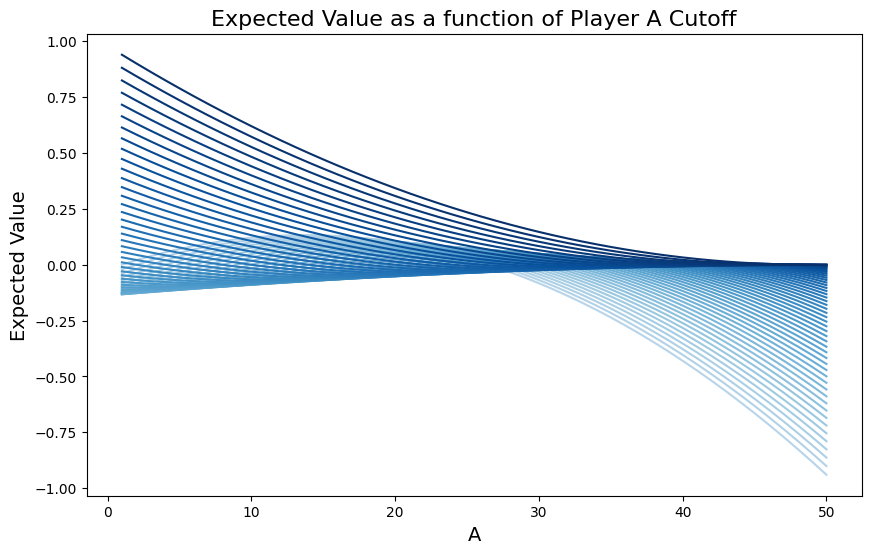

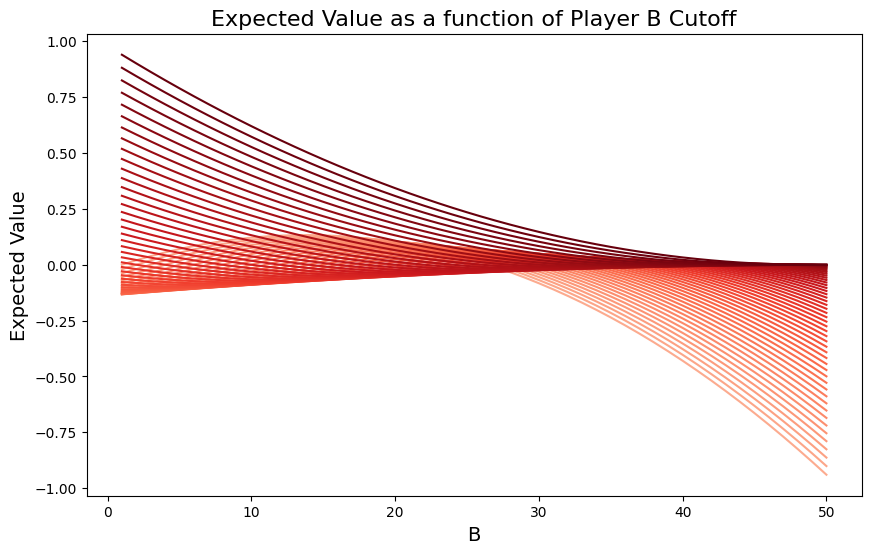

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

N = 50

def E1(alpha, beta, n):

  # (-3αb + α² + 2β² - 2β + 2α - nβ + nα) / (n (n - 1)), {β > α}
  if beta > alpha:
    return ((-3 * alpha * beta )+ (alpha * alpha) + (2 * beta * beta) - (2 * beta) + (2 * alpha) - (n * beta) + (n * alpha)) / (n * (n - 1))

  # (-3αb + β² + 2α² - 2α + 2β - nα + nβ) / (n(n-1)), {α > β}
  elif alpha > beta: return ((3 * alpha * beta) - (beta * beta) - (2 * alpha * alpha) + (2 * alpha) - (2 * beta) + (n * alpha) - (n * beta)) / (n * (n - 1))

  else: return 0

def E2(alpha, beta, n):
  return -1 * E1(alpha, beta, n)

  # (-3αb + α² + 2β² - 2β + 2α - nβ + nα) / (n (n - 1)), {β > α}
  if beta > alpha:
    return ((-3 * alpha * beta )+ (alpha * alpha) + (2 * beta * beta) - (2 * beta) + (2 * alpha) - (n * beta) + (n * alpha)) / (n * (n - 1))

  # (-3αb + β² + 2α² - 2α + 2β - nα + nβ) / (n (n - 1)), {α > β}
  elif alpha > beta: return ((-3 * alpha * beta) + (beta * beta) + (2 * alpha * alpha) - (2 * alpha) + (2 * beta) - (n * alpha) + (n * beta)) / (n * (n - 1))

  else: return 0

def level_curves(n, P1=True, P2=False):
    values = np.arange(1, n + 1, 1)
    plt.figure(figsize=(10, 6))

    if P1:
        colors = cm.Blues(np.linspace(0.3, 1, n))
        for beta, color in zip(range(1, n + 1), colors):
            results = [E1(alpha, beta, n) for alpha in values]
            plt.plot(values, results, linestyle='-', color=color, label=f'B = {beta}')
        plt.xlabel('A', fontsize=14)
        plt.title('Expected Value as a function of Player A Cutoff', fontsize=16)

    if P2:
        colors = cm.Reds(np.linspace(0.3, 1, n))
        for alpha, color in zip(range(1, n + 1), colors):
            results = [E2(alpha, beta, n) for beta in values]
            plt.plot(values, results, linestyle='-', color=color, label=f'A = {alpha}')
        plt.xlabel('B', fontsize=14)
        plt.title('Expected Value as a function of Player B Cutoff', fontsize=16)

    plt.ylabel('Expected Value', fontsize=14)

    plt.grid(False)
    # plt.xticks([])
    # plt.yticks([])

    plt.show()

level_curves(n=N, P1=True, P2=False)
level_curves(n=N, P1=False, P2=True)
# level_curves(n=N, P1=True, P2=True)

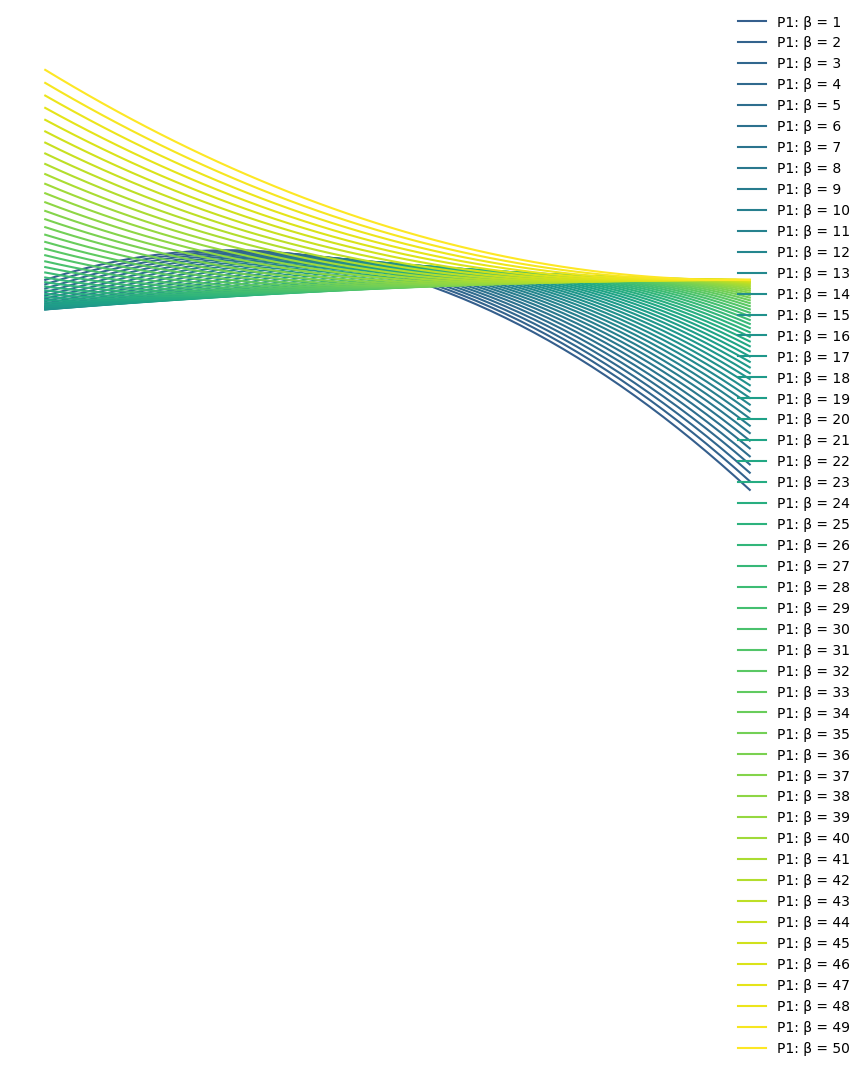

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def level_curves(n, P1=True, P2=False):
    values = np.arange(1, n + 1, 1)
    plt.figure(figsize=(10, 6), facecolor='none')  # Transparent figure background

    if P1:
        colors = cm.viridis(np.linspace(0.3, 1, n))  # Use Viridis colormap
        for beta, color in zip(range(1, n + 1), colors):
            results = [E1(alpha, beta, n) for alpha in values]
            plt.plot(values, results, linestyle='-', color=color, label=f'P1: β = {beta}')

    if P2:
        colors = cm.viridis(np.linspace(0.3, 1, n))  # Use Viridis colormap
        for alpha, color in zip(range(1, n + 1), colors):
            results = [E2(alpha, beta, n) for beta in values]
            plt.plot(values, results, linestyle='-', color=color, label=f'P2: α = {alpha}')

    # Remove all axes and labels
    ax = plt.gca()
    ax.set_facecolor('none')  # Transparent plot background
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')

    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), facecolor='none', edgecolor='none')

    plt.grid(False)
    plt.show()

# Example usage
level_curves(n=N, P1=True, P2=False)

## Parallel Processing


┌───────────────────────────────────────────┐
│ Executed all iterations in 1.869 seconds. │
└───────────────────────────────────────────┘


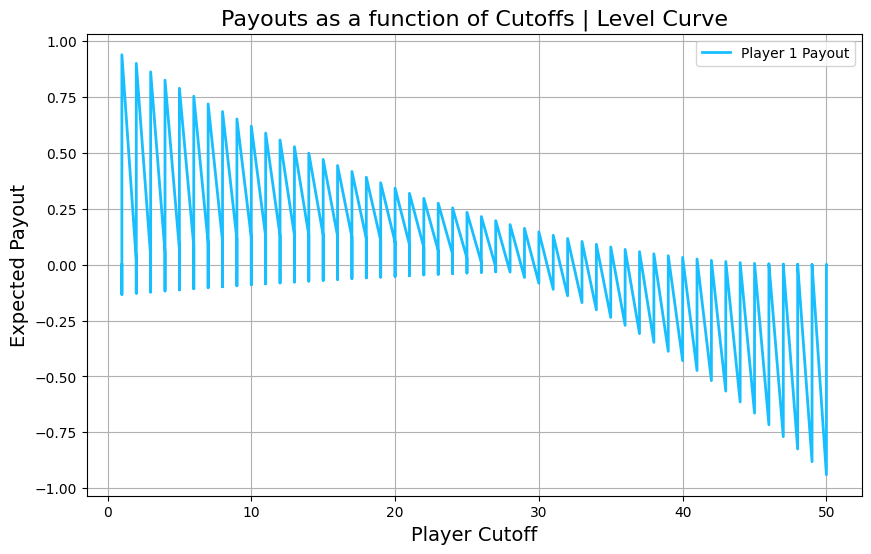

In [ ]:
#@title { vertical-output: true }

from multiprocessing import Pool
import itertools
import time
import os

n = 50
test_range = n
trials = nCr(n)
log_data = []

def calculate_payoffs(args):
    p1_cutoff, p2_cutoff = args
    start_time = time.time()

    p1_payout = 0
    p2_payout = 0

    for p1_card in range(1, n + 1):
        for p2_card in range(1, n + 1):
            if p1_card == p2_card:
                continue

            if p1_card >= p1_cutoff and p2_card >= p2_cutoff:
                if p1_card > p2_card:
                    p1_payout += 2
                    p2_payout -= 2
                else:
                    p1_payout -= 2
                    p2_payout += 2
            elif p1_card < p1_cutoff and p2_card < p2_cutoff:
                if p1_card > p2_card:
                    p1_payout += 1
                    p2_payout -= 1
                else:
                    p1_payout -= 1
                    p2_payout += 1
            elif p1_card >= p1_cutoff:
                p1_payout += 1
                p2_payout -= 1
            elif p2_card >= p2_cutoff:
                p1_payout -= 1
                p2_payout += 1

    time_taken = time.time() - start_time
    return (p1_cutoff, p2_cutoff, p1_payout/trials, p2_payout/trials, time_taken)

def parallel_test_cutoffs():
    start_time = time.time()

    cutoff_combinations = itertools.product(range(1, test_range + 1), range(1, test_range + 1))
    num_processes = os.cpu_count()

    with Pool(processes=num_processes) as pool:
        results = pool.map(calculate_payoffs, cutoff_combinations)

    for result in results:
        log(*result, verbose=False)

    boxed(f"Executed all iterations in {round(time.time() - start_time, 3)} seconds.\n")

parallel_test_cutoffs()

# Now you can use all your existing visualization functions
graph_scatter_3d(P1)
# graph_contour_3d(P1)
graph_2d(P1)
# expected_payoffs_table(P1)
save()

# Tournament

## Robot Setup

In [ ]:
import random

RED = '\033[38;2;242;36;53m'
YELLOW = '\033[38;2;255;193;69m'
GREEN = '\033[38;2;43;255;128m'
BLUE = '\033[38;2;43;241;255m'
COLORS = [RED, YELLOW, GREEN, BLUE]

class Robot:
    def __init__(self, name="Robot", n=None, betting_set=None, bluffing_set=None):
        global LOG

        if n is None:
            raise TypeError("n must be greater than 0.")

        self.name = name
        self.game_range = n
        self.card = -1
        self.color = COLORS.pop()
        self.balance = 0
        self.wins = 0
        self.total = 0

        all_cards = [c for c in range(1, n + 1)]

        if isinstance(betting_set, int):
          self.betting_set = [[c, 1.0] for c in range(1, betting_set + 1)]
          betting = [c for c in range(1, betting_set + 1)]
          self.bluffing_set = [[c, 0.0] for c in all_cards if c not in betting]
        elif isinstance(betting_set, list):
          if len(betting_set) > 0 and isinstance(betting_set[0], list):
            self.betting_set = betting_set
          else:
            self.betting_set = [[c, 1.0] for c in betting_set]
          self.bluffing_set = [[c, 0.0] for c in all_cards if c not in betting_set]
        elif betting_set is None:
          self.betting_set = []
        else:
          raise TypeError("Invalid betting/bluffing set.")

        if LOG:
            print(f"Initialized {self.get_name()} with betting set {self.betting_set} and bluffing set {self.bluffing_set}.")

    def get_name(self):
        return f"{self.color}{self.name}\033[0m"

    def receive_card(self, c):
        global LOG
        if LOG:
            print(f"{self.get_name()} received a {c}")
        self.card = c

    def decide_action(self):
        global LOG
        if self.card == -1:
            print(f"[ERROR] > {self.get_name()} is unable to act without a hand.")
            return

        # Check betting set
        for val, prob in self.betting_set:
            if val == self.card:
                if random.random() < prob:
                    if LOG: print(f"{self.get_name()} decided to BET on {self.card}")
                    return "bet"
                else:
                    if LOG: print(f"{self.get_name()} decided to FOLD on {self.card} (betting set)")
                    return "fold"

        # Check bluffing set
        for val, prob in self.bluffing_set:
            if val == self.card:
                if random.random() < prob:
                    if LOG: print(f"{self.get_name()} decided to BET (bluff) on {self.card}")
                    return "bet"
                else:
                    if LOG: print(f"{self.get_name()} decided to FOLD on {self.card} (bluffing set)")
                    return "fold"

        # Not in any set, fold by default
        if LOG: print(f"{self.get_name()} decided to FOLD on {self.card} (not in any set)")
        return "fold"

    def reset(self):
        self.card = -1

    def factory_reset(self):
        self.card = -1
        self.balance = 0
        self.wins = 0
        self.total = 0

    def win_rate(self):
        return 0 if self.total == 0 else (1.0 * self.wins) / self.total


N = 5
LOG = False
p1 = Robot("Archibald", n=N, betting_set = 4)
p2 = Robot("Bartholomew", n=N, betting_set = [2, 4])

# p1.receive_card(2)
# p1.decide_action()

## Round Setup

In [ ]:
def single_round(robot1, robot2, verbose=True):

    card1 = random.randint(1, robot1.game_range + 1)
    card2 = random.randint(1, robot2.game_range + 1)
    while card2 == card1:
        card2 = random.randint(1, robot2.game_range + 1)

    if verbose:
        print(f"\n--- ROUND: {robot1.get_name()} vs {robot2.get_name()} ---")

    robot1.receive_card(card1)
    robot2.receive_card(card2)
    if verbose: print()

    action1 = robot1.decide_action()
    action2 = robot2.decide_action()

    winner = None
    result = ""
    pot = 0

    if action1 == "bet" and action2 == "bet":
        pot = 2
        if robot1.card > robot2.card:
            winner = robot1
            robot1.balance += pot
            robot2.balance -= pot
            result = f"\nDOUBLE BET SHOWDOWN: {winner.get_name()} wins ${pot} with a high card of {robot1.card} vs {robot2.card}"
        else:
            winner = robot2
            robot2.balance += pot
            robot1.balance -= pot
            result = f"\nDOUBLE BET SHOWDOWN: {winner.get_name()} wins ${pot} with a high card of {robot2.card} vs {robot1.card}"

    elif action1 == "bet":
        pot = 1
        winner = robot1
        robot1.balance += pot
        robot2.balance -= pot
        result = f"\nFORFEIT: {robot2.get_name()} folded, {robot1.get_name()} wins $1"

    elif action2 == "bet":
        pot = 1
        winner = robot2
        robot2.balance += pot
        robot1.balance -= pot
        result = f"\nFORFEIT: {robot1.get_name()} folded, {robot2.get_name()} wins $1"

    else:
        pot = 1
        if robot1.card > robot2.card:
            winner = robot1
            robot1.balance += pot
            robot2.balance -= pot
        else:
            winner = robot2
            robot2.balance += pot
            robot1.balance -= pot
        result = f"\nDOUBLE FOLD SHOWDOWN: {winner.get_name()} wins $1 with a high card of {max(robot1.card, robot2.card)} vs {min(robot1.card, robot2.card)}"

    winner.wins += 1
    robot1.total += 1
    robot2.total += 1

    if verbose:
        print(result)
        print(f"\nStats:")
        print(f"{robot1.get_name()}: ${robot1.balance} | Win rate: {robot1.win_rate():.1%}")
        print(f"{robot2.get_name()}: ${robot2.balance} | Win rate: {robot2.win_rate():.1%}")

    robot1.reset()
    robot2.reset()

    return winner, result

## Matchup Setup

In [ ]:
def matchup(robot1, robot2, trials=100, verbose=False):

    robot1.factory_reset()
    robot2.factory_reset()

    print(f"\n=== STARTING MATCHUP: {robot1.get_name()} vs {robot2.get_name()} ===\n")

    print(f"Stats: {robot1.get_name()}")
    print(f"Bets on {robot1.betting_set}")
    print(f"Bluffs on {robot1.bluffing_set}")

    print(f"\nStats: {robot2.get_name()}")
    print(f"Bets on {robot2.betting_set}")
    print(f"Bluffs on {robot2.bluffing_set}")

    print(f"\nRunning {trials} rounds...\n")

    for i in range(1, trials + 1):
        if verbose:
            print(f"\nMatch {i}:")
        single_round(robot1, robot2, verbose=verbose)

    if robot1.balance > robot2.balance:
        tournament_winner = robot1
    elif robot2.balance > robot1.balance:
        tournament_winner = robot2
    else:
        tournament_winner = None

    results = {
        'robot1': {
            'name': robot1.name,
            'color': robot1.color,
            'final_balance': robot1.balance,
            'wins': robot1.wins,
            'win_rate': robot1.win_rate()
        },
        'robot2': {
            'name': robot2.name,
            'color': robot2.color,
            'final_balance': robot2.balance,
            'wins': robot2.wins,
            'win_rate': robot2.win_rate()
        },
        'trials': trials,
        'winner': tournament_winner.name if tournament_winner else "Tie"
    }

    print(f"=== MATCHUP RESULTS ===")
    print(f"After {trials} matchups:")
    print(f"{robot1.get_name()}: ${robot1.balance} | Win rate: {robot1.win_rate():.3%} | EV: {robot1.balance / trials:.3}")
    print(f"{robot2.get_name()}: ${robot2.balance} | Win rate: {robot2.win_rate():.3%} | EV: {robot2.balance / trials:.3}")
    if tournament_winner:
        print(f"\nMATCHUP WINNER: {tournament_winner.get_name()}!")
    else:
        print("\nMATCHUP RESULT: Tie!")

    return results

COLORS = [GREEN, BLUE, YELLOW, RED]

LOG = False
N = 3

# rr = Robot("Ricky McRisky", n=N, betting_set=N) # bet on everything
# omc = Robot("Old Man Coffee", n=N, betting_set=[c for c in range(round(N / 2), N + 1)]) # bet on high cards
# ff = Robot("Foldy F. Flannigan", n=N, betting_set=0) # bet on nothing

# p1 = Robot("Player 1", n=N, betting_set=[[1, 1], [2, 1], [3, 1]])
# p2 = Robot("Player 2", n=N, betting_set=[[1, 1], [3, 1]])

p1 = Robot("Player 1", n=N, betting_set=[(1, 1/3), (2, 1/3), (3, 1)])
p2 = Robot("Player 2", n=N, betting_set=[(1, 1/3), (2, 1/3), (3, 1)])

results = matchup(p1, p2, trials=100000, verbose=LOG)


=== STARTING MATCHUP: Player 1 vs Player 2 ===

Stats: Player 1
Bets on [[(1, 0.3333333333333333), 1.0], [(2, 0.3333333333333333), 1.0], [(3, 1), 1.0]]
Bluffs on [[1, 0.0], [2, 0.0], [3, 0.0]]

Stats: Player 2
Bets on [[(1, 0.3333333333333333), 1.0], [(2, 0.3333333333333333), 1.0], [(3, 1), 1.0]]
Bluffs on [[1, 0.0], [2, 0.0], [3, 0.0]]

Running 100000 rounds...

=== MATCHUP RESULTS ===
After 100000 matchups:
Player 1: $282 | Win rate: 50.141% | EV: 0.00282
Player 2: $-282 | Win rate: 49.859% | EV: -0.00282

MATCHUP WINNER: Player 1!


## Poker Madness

In [ ]:
import itertools
import colorsys

def generate_colors(num_colors):
    colors = []
    for i in range(num_colors):
        hue = i / num_colors
        saturation = 1.0
        value = 0.9
        r, g, b = colorsys.hsv_to_rgb(hue, saturation, value)
        r, g, b = int(r * 255), int(g * 255), int(b * 255)
        color_code = f'\033[38;2;{r};{g};{b}m'
        colors.append(color_code)
    return colors

def poker_madness(N=3, trials=100):
    global COLORS
    all_strategies = [[]]
    for k in range(1, N+1):
        all_strategies.extend(itertools.combinations(range(1, N+1), k))

    COLORS = generate_colors(max(0, len(all_strategies)))

    players = []
    for i, strategy in enumerate(all_strategies):
        name = f"Strategy Space [{', '.join(map(str, strategy))}]"
        players.append(Robot(name=name, n=N, betting_set=list(strategy)))

    print(f"\n=== BATTLE ROYALE WITH {len(players)} PLAYERS ===")
    results = []
    for p1, p2 in itertools.combinations(players, 2):
        print(f"\nMATCHUP: {p1.get_name()} vs {p2.get_name()}")
        res = matchup(p1, p2, trials=trials)
        results.append(res)
        p1.factory_reset()
        p2.factory_reset()

poker_madness(N=3, trials=100000)


=== BATTLE ROYALE WITH 8 PLAYERS ===

MATCHUP: Strategy Space [] vs Strategy Space [1]

=== STARTING MATCHUP: Strategy Space [] vs Strategy Space [1] ===

Stats: Strategy Space []
Bets on []
Bluffs on [[1, 0.0], [2, 0.0], [3, 0.0]]

Stats: Strategy Space [1]
Bets on [[1, 1.0]]
Bluffs on [[2, 0.0], [3, 0.0]]

Running 100000 rounds...

=== MATCHUP RESULTS ===
After 100000 matchups:
Strategy Space []: $-50708 | Win rate: 24.646% | EV: -0.507
Strategy Space [1]: $50708 | Win rate: 75.354% | EV: 0.507

MATCHUP WINNER: Strategy Space [1]!

MATCHUP: Strategy Space [] vs Strategy Space [2]

=== STARTING MATCHUP: Strategy Space [] vs Strategy Space [2] ===

Stats: Strategy Space []
Bets on []
Bluffs on [[1, 0.0], [2, 0.0], [3, 0.0]]

Stats: Strategy Space [2]
Bets on [[2, 1.0]]
Bluffs on [[1, 0.0], [3, 0.0]]

Running 100000 rounds...

=== MATCHUP RESULTS ===
After 100000 matchups:
Strategy Space []: $-33256 | Win rate: 33.372% | EV: -0.333
Strategy Space [2]: $33256 | Win rate: 66.628% | EV: 0

# Genetic Algorithm

In [ ]:
#@title { vertical-output: true }

import random
from fractions import Fraction

RED = '\033[38;2;242;36;53m'
YELLOW = '\033[38;2;255;193;69m'
GREEN = '\033[38;2;43;255;128m'
BLUE = '\033[38;2;43;241;255m'
COLORS = [RED, YELLOW, GREEN, BLUE]

def decimal_to_fraction(decimal, max_denominator=10):
    fraction = Fraction(decimal).limit_denominator(max_denominator)
    return f"{fraction.numerator}/{fraction.denominator}"

class Learner(Robot):
    def __init__(self, name="Robot", n=None, betting_set=None, bluffing_set=None, temperature=0.1):
        super().__init__(name=name, n=n, betting_set=betting_set, bluffing_set=bluffing_set)
        self.temperature=temperature # ranges between [0, 2], higher is more random
        self.previous_betting_set = []
        self.previous_bluffing_set = []
        self.previous_fitness = 0
        self.current_fitness = 0


    def mutate(self):
      for pair in self.betting_set:
        pair[1] += (-1) ** random.randint(0, 1) * (random.random() * (self.temperature / 2))
        pair[1] = max(min(pair[1], 1), 0)

    def update_fitness(self, EV):
      self.previous_fitness = self.current_fitness
      self.previous_betting_set = self.betting_set
      self.previous_bluffing_set = self.bluffing_set
      self.current_fitness = EV

def play(robot1, robot2):

    card1 = random.randint(1, robot1.game_range + 1)
    card2 = random.randint(1, robot2.game_range + 1)
    while card2 == card1:
        card2 = random.randint(1, robot2.game_range + 1)

    robot1.receive_card(card1)
    robot2.receive_card(card2)

    action1 = robot1.decide_action()
    action2 = robot2.decide_action()

    winner = None
    result = ""
    pot = 0

    if action1 == "bet" and action2 == "bet":
        pot = 2
        if card1 > card2:
            winner = robot1
            # result = f"\nDOUBLE BET SHOWDOWN: {winner.get_name()} wins ${pot} with {card1} vs {card2}"
        else:
            winner = robot2
            # result = f"\nDOUBLE BET SHOWDOWN: {winner.get_name()} wins ${pot} with {card2} vs {card1}"

    elif action1 == "bet":
        pot = 1
        winner = robot1
        # result = f"\nFORFEIT: {robot2.get_name()} folded, {robot1.get_name()} wins $1"

    elif action2 == "bet":
        pot = 1
        winner = robot2
        # result = f"\nFORFEIT: {robot1.get_name()} folded, {robot2.get_name()} wins $1"

    else:  # Both folded
        pot = 1
        if card1 > card2:
            winner = robot1
        else:
            winner = robot2
        # result = f"\nDOUBLE FOLD SHOWDOWN: {winner.get_name()} wins $1 with {max(card1, card2)} vs {min(card1, card2)}"

    if winner == robot1:
        robot1.balance += pot
        robot2.balance -= pot
    else:
        robot2.balance += pot
        robot1.balance -= pot

    winner.wins += 1
    robot1.total += 1
    robot2.total += 1

    return winner, result

def play_and_learn(p1, p2, trials=100000, generations=500):
    successful_strategies = []

    for generation in range(generations):
        p1.factory_reset()
        p2.factory_reset()

        for _ in range(trials):
            play(p1, p2)

        p1_ev = p1.balance / trials
        p2_ev = p2.balance / trials
        p1_win_rate = p1.win_rate()
        p2_win_rate = p2.win_rate()

        p1.update_fitness(p1_ev)
        p2.update_fitness(p2_ev)

        # Check if win rates are within 1% of 50%
        if abs(p1_win_rate - 0.5) < 0.01 and abs(p2_win_rate - 0.5) < 0.01:
            successful_strategies.append([p1.betting_set.copy(), p2.betting_set.copy()])

        feed = f'''=== GENERATION {generation + 1}/{generations} ===
{p1.get_name()} \
\n  Betting Set:  {p1.betting_set} \
\n  Win Rate:     {p1_win_rate:.2%} \
\n  Balance:      ${p1.balance} \
\n  Previous EV:  {p1.previous_fitness:.4f} (≈ {decimal_to_fraction(p1.previous_fitness)}) \
\n  Current EV:   {p1.current_fitness:.4f} (≈ {decimal_to_fraction(p1.current_fitness)}) \

{p2.get_name()} \
\n  Betting Set:  {p2.betting_set} \
\n  Win Rate:     {p2_win_rate:.2%} \
\n  Balance:      ${p2.balance} \
\n  Previous EV:  {p2.previous_fitness:.4f} (≈ {decimal_to_fraction(p2.previous_fitness)}) \
\n  Current EV:   {p2.current_fitness:.4f} (≈ {decimal_to_fraction(p2.current_fitness)}) \
\n'''
        print(feed)

        if p1.current_fitness < p1.previous_fitness:
            p1.betting_set = p1.previous_betting_set.copy()
        else:
            p1.mutate()

        if p2.current_fitness < p2.previous_fitness:
            p2.betting_set = p2.previous_betting_set.copy()
        else:
            p2.mutate()

        # makes it change less over time, but i think
        # this is making it harder for robots to get back to nash equil
        # p1.temperature *= 0.99
        # p2.temperature *= 0.99

    # Print all successful strategy pairs at the end
    # print(f"\n{GREEN}=== SUCCESSFUL STRATEGY PAIRS (≈50% win rate) ===")
    # for i, (p1_set, p2_set) in enumerate(successful_strategies, 1):
    #     print(f"\nPair {i}:")
    #     print(f"{p1.get_name()}: {p1_set}")
    #     print(f"{p2.get_name()}: {p2_set}")

    # print(f"\nFound {len(successful_strategies)} strategy pairs with ≈50% win rates")

N = 3
LOG = False

p1 = Learner("Big Steppa", n=N, betting_set=N, temperature=0.5)
p2 = Learner("Bag Getta", n=N, betting_set=N, temperature=0.5)

# p1 = Learner("Big Steppa", n=N, betting_set=[[1, 1/3], [2, 1/3], [3, 1]], temperature=0.5)
# p2 = Learner("Bag Getta", n=N, betting_set=[[1, 1/3], [2, 1/3], [3, 1]], temperature=0.5)

play_and_learn(p1, p2)

Streaming output truncated to the last 5000 lines.
  Current EV:   -0.1764 (≈ -1/6) 

=== GENERATION 33/500 ===
Big Steppa 
  Betting Set:  [[1, 0.4954160164320614], [2, 1], [3, 0.8422515595576759]] 
  Win Rate:     59.99% 
  Balance:      $21555 
  Previous EV:  0.1764 (≈ 1/6) 
  Current EV:   0.2155 (≈ 2/9) 
Bag Getta 
  Betting Set:  [[1, 0.4104888810839531], [2, 0.7697245074479053], [3, 0.5542435533249808]] 
  Win Rate:     40.01% 
  Balance:      $-21555 
  Previous EV:  -0.1764 (≈ -1/6) 
  Current EV:   -0.2155 (≈ -2/9) 

=== GENERATION 34/500 ===
Big Steppa 
  Betting Set:  [[1, 0.35673467331289743], [2, 1], [3, 0.7854552882676584]] 
  Win Rate:     56.90% 
  Balance:      $16418 
  Previous EV:  0.2155 (≈ 2/9) 
  Current EV:   0.1642 (≈ 1/6) 
Bag Getta 
  Betting Set:  [[1, 0.4104888810839531], [2, 0.7697245074479053], [3, 0.5542435533249808]] 
  Win Rate:     43.10% 
  Balance:      $-16418 
  Previous EV:  -0.2155 (≈ -2/9) 
  Current EV:   -0.1642 (≈ -1/6) 

=== GENERATION 35